# Oja's rule

Import the packages

In [10]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import time

Load the data and standardise the data. The data is 100000 $\times$ 6 matrix. In each row, the first two entries represent the x,y coordinate of the point and the rest entries are 0 which contain no information.

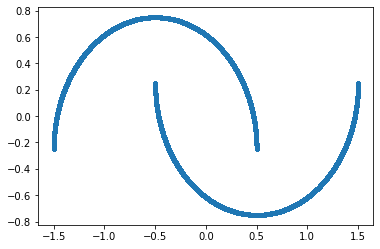

In [26]:
x=datasets.make_moons(n_samples=1000000)[0]
y=np.zeros((1000000,4))
x=np.concatenate((x,y),axis=1)
x=x-np.mean(x,axis=0)

plt.plot(x[:,0],x[:,1],'.')
plt.show()

### The Oja's Algorithm

For i in 1,2,3,....\
\
$V_i=V_{i-1}+\eta x_i^Tx_iV_{i-1}$\
QR factorise $V_i$, $QR=V_i$\
$V_i=Q$
    

In [51]:
def oja(X,eta):
    
    t,length = X.shape
    V = np.random.randn(length,2)
    V,_ = np.linalg.qr(V, mode='reduced')
    Vp = V.copy()
    
    for i in range(t):
        temp=X[i,:]
        temp=temp.reshape((1,len(temp)))
        V += eta*np.dot(temp.T,temp)@V
        
        if np.linalg.norm(Vp-V)/np.linalg.norm(V) <1e-6:
            break
        else:
            Vp=V.copy()
        
        V,_ = np.linalg.qr(V, mode='reduced')
        
    return V

### PCA computed by the Oja's method

In [52]:
oja_start = time.time()
oja_pca=oja(X = x,eta = 0.001)
oja_end = time.time()
print('Time taken for Oja',oja_end-oja_start)
print(oja_pca)

Time taken for Oja 47.1794159412384
[[-9.49079736e-001 -3.15123627e-001]
 [ 3.15035966e-001 -9.49338722e-001]
 [ 1.00669947e-244  1.57005073e-054]
 [-9.45132993e-245  1.62059632e-055]
 [ 3.68924666e-244  8.94728398e-055]
 [ 8.87177293e-245 -3.40919308e-055]]


### PCA function in sklearn

In [48]:
pca_start = time.time()
pca = PCA(n_components=6)
pca.fit(x)
pca_end = time.time()
print('Time taken for PCA',pca_end-pca_start)
print('varaince ratio:')
print(pca.explained_variance_ratio_)
print('princeple component:')
print(pca.components_)

Time taken for PCA 0.16864442825317383
varaince ratio:
[0.82018332 0.17981668 0.         0.         0.         0.        ]
princeple component:
[[ 0.94723096 -0.32055188  0.          0.          0.          0.        ]
 [-0.32055188 -0.94723096 -0.         -0.         -0.         -0.        ]
 [ 0.          0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.          1.        ]
 [ 0.          0.          0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.        ]]
